In [134]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
window = 1

In [135]:
def search_start_date(year, month, date):
    if year % 4 !=0:
        month_date = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        month_date = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if date >= window + 1:
        start_year = year
        start_month = month
        start_date = date - window
    else:
        if month == 1:
            start_year = year - 1
            start_month = 12
            start_date = 31 - date - window
        else:
            start_year = year
            start_month = month - 1
            start_date = month_date[month - 1] - date - window
    return [start_year, start_month, start_date]


In [136]:
def search_end_date(year, month, date):
    if year % 4 !=0:
        month_date = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        month_date = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if date + window <= month_date[month]:
        end_year = year
        end_month = month
        end_date = date + window
    else:
        if month == 12:
            end_year = year + 1
            end_month = 1
            end_date = date + window - 31
        else:
            end_year = year
            end_month = month + 1
            end_date = date + window - month_date[month + 1]
    return [end_year, end_month, end_date]

In [137]:
# The original CARROTS paper uses a 31-day time window, but the window can be set to other values. 
# Just modify the global parameter 'window'
def average_31_days_MFBS(year, month, date):
    if year % 4 != 0:
        month_date = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        month_date = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    startdate = search_start_date(year, month, date)
    enddate = search_end_date(year, month, date)
    print(startdate)
    print(enddate)

    output_MFBS_image = np.zeros((765, 700))
    output_RT_image = np.zeros((765, 700))
    output_image = np.zeros((765, 700))

    start_year = startdate[0]
    start_month = startdate[1]
    start_date = startdate[2]
    end_year = enddate[0]
    end_month = enddate[1]
    end_date = enddate[2]
    
    if start_month < 10:
        stmth = "0" + str(start_month)
    else:
        stmth = str(start_month)
    if end_month < 10:
        enmth = "0" + str(end_month)
    else:
        enmth = str(end_month)

    if start_month != end_month:
        for date in range(start_date, month_date[start_month] + 1):
            if date < 10:
                dt = "0" + str(date)
            else:
                dt = str(date)
            for hour in range(0, 24):
                if hour < 10:
                    hr = "0" + str(hour)
                else:
                    hr = str(hour)
                for minute in range(0, 60, 5):
                    if minute < 10:
                        mnt = "0" + str(minute)
                    else:
                        mnt = str(minute)

                    #open MFBS file
                    filename_MFBS = "E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_" + str(start_year - 1) + "1231T235500_" + str(start_year) + "1231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/" + str(start_year) + "/" + stmth + "/" + \
                    "RAD_NL25_RAC_MFBS_EM_5min_" + str(start_year) + stmth + dt + hr + mnt + "_NL.h5"
                    print(filename_MFBS)
                    f = h5py.File(filename_MFBS)['image1']['image_data']
                    f = np.array(list(f))
                    #f = f / 100
                    #f = f * 12
                    #open RT file
                    filename_RT = "F://" + str(start_year) + "/" + stmth + "/" +"RAD_NL25_RAP_5min_" + str(start_year) + stmth + dt + hr + mnt + ".h5"
                    print(filename_RT)
                    f1 = h5py.File(filename_RT)['image1']['image_data']
                    f1 = np.array(list(f1))
                    #f1 = f1 / 100
                    #f1 = f1 * 12

                    for x in range(0, 765):
                        for y in range(0, 700):
                            if (f[x][y] < 5000) and (f1[x][y] < 5000):
                                output_MFBS_image[x][y] = output_MFBS_image[x][y] + f[x][y]
                                output_RT_image[x][y] = output_RT_image[x][y] + f1[x][y]
        for date in range(1, end_date + 1):
            if date < 10:
                dt = "0" + str(date)
            else:
                dt = str(date)
            for hour in range(0, 24):
                if hour < 10:
                    hr = "0" + str(hour)
                else:
                    hr = str(hour)
                for minute in range(0, 60, 5):
                    if minute < 10:
                        mnt = "0" + str(minute)
                    else:
                        mnt = str(minute)
                    filename_MFBS = "E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_" + str(end_year - 1) + "1231T235500_" + str(end_year) + "1231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/" + str(end_year) + "/" + enmth + "/" + \
                    "RAD_NL25_RAC_MFBS_EM_5min_" + str(end_year) + enmth + dt + hr + mnt + "_NL.h5"
                    print(filename_MFBS)
                    f = h5py.File(filename_MFBS)['image1']['image_data']
                    f = np.array(list(f))
                    #f = f / 100
                    #f = f * 12
                    #open RT file
                    filename_RT = "F://" + str(end_year) + "/" + enmth + "/" +"RAD_NL25_RAP_5min_" + str(end_year) + enmth + dt + hr + mnt + ".h5"
                    print(filename_RT)
                    f1 = h5py.File(filename_RT)['image1']['image_data']
                    f1 = np.array(list(f1))
                    #f1 = f1 / 100
                    #f1 = f1 * 12

                    for x in range(0, 765):
                        for y in range(0, 700):
                            if (f[x][y] < 5000) and (f1[x][y] < 5000):
                                output_MFBS_image[x][y] = output_MFBS_image[x][y] + f[x][y]
                                output_RT_image[x][y] = output_RT_image[x][y] + f1[x][y]

    else:
        for date in range(start_date, end_date + 1):
            if date < 10:
                dt = "0" + str(date)
            else:
                dt = str(date)
            for hour in range(0, 24):
                if hour < 10:
                    hr = "0" + str(hour)
                else:
                    hr = str(hour)
                for minute in range(0, 60, 5):
                    if minute < 10:
                        mnt = "0" + str(minute)
                    else:
                        mnt = str(minute)

                    # open MFBS file
                    filename_MFBS = "E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_" + str(start_year - 1) + "1231T235500_" + str(start_year) + "1231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/" + str(start_year) + "/" + stmth + "/" + \
                    "RAD_NL25_RAC_MFBS_EM_5min_" + str(start_year) + stmth + dt + hr + mnt + "_NL.h5"
                    print(filename_MFBS)
                    f = h5py.File(filename_MFBS)['image1']['image_data']
                    f = np.array(list(f))
                    #f = f / 100
                    #f = f * 12
                    # open RT file
                    filename_RT = "F://" + str(start_year) + "/" + stmth + "/" + "RAD_NL25_RAP_5min_" + str(start_year) + stmth + dt + hr + mnt + ".h5"
                    print(filename_RT)
                    f1 = h5py.File(filename_RT)['image1']['image_data']
                    f1 = np.array(list(f1))
                    #f1 = f1 / 100
                    #f1 = f1 * 12

                    for x in range(0, 765):
                        for y in range(0, 700):
                            if (f[x][y] < 5000) and (f1[x][y] < 5000):
                                output_MFBS_image[x][y] = output_MFBS_image[x][y] + f[x][y]
                                output_RT_image[x][y] = output_RT_image[x][y] + f1[x][y]

    for x in range(0, 765):
        for y in range(700):
            if (output_MFBS_image[x][y] != 0) and (output_RT_image[x][y] !=0):
                output_image[x][y] = output_MFBS_image[x][y] / output_RT_image[x][y]
            else:
                output_image[x][y] = 1


    return output_image


In [194]:
#calculate mse and mae of one image
MSE = 0
MSE1 = 0
MAE = 0
MAE1 = 0

year = "2012"
month = "10"
date = "23"
hour = "23"
minute = "30"

i = 0
j = 0
index = 0

filename_MFBS = "E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20111231T235500_20121231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/"+ year + "/" + month + "/" + \
"RAD_NL25_RAC_MFBS_EM_5min_" + year + month + date + hour + minute + "_NL.h5"
print(filename_MFBS)
f = h5py.File(filename_MFBS)['image1']['image_data']
f = np.array(list(f))
#f = np.where(f == 65535, -1, f) 
#f = np.ma.masked_where(f <= 0, f)
f = f / 100
f = f * 12
filename_RT = "F://"+ year + "//" + month + "//" + \
"RAD_NL25_RAP_5min_" + year + month + date + hour + minute + ".h5"
f1 = h5py.File(filename_RT)['image1']['image_data']
f1 = np.array(list(f1))
#f1 = np.where(f1 == 65535, -1, f1) 
#f1 = np.ma.masked_where(f1 <= 0, f1)
f1 = f1 / 100
f1 = f1 * 12

'''
plt.imshow(f)
plt.colorbar()
plt.show()
'''


print(f[0][1])
print(f1[0][1])
for x in range(0, 765):
    for y in range(0, 700):
        if f[x][y] < 5000 and f1[x][y] < 5000:
            '''
            if f[x][y] != f1[x][y]:
                print("f[" + str(x) + "][" + str(y) + "] = " + str(f[x][y]))
                print("f1[" + str(x) + "][" + str(y) + "] = " + str(f1[x][y]))
            '''
            MSE = MSE + (f[x][y] - f1[x][y])**2
            MAE = MAE + abs(f[x][y] - f1[x][y])
            
            i = i + 1
            

MSE = MSE / i
MAE = MAE / i
#print(str(i))
print("Original MSE is:" + str(MSE))
print("Original MAE is:" + str(MAE))

E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20111231T235500_20121231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2012/10/RAD_NL25_RAC_MFBS_EM_5min_201210232330_NL.h5


C:\Users\zywang\AppData\Local\Temp/ipykernel_36440/3396494072.py:19: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filename_MFBS)['image1']['image_data']
C:\Users\zywang\AppData\Local\Temp/ipykernel_36440/3396494072.py:27: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f1 = h5py.File(filename_RT)['image1']['image_data']


7864.200000000001
7864.200000000001
Original MSE is:0.28349468774108677
Original MAE is:0.10018048404168439


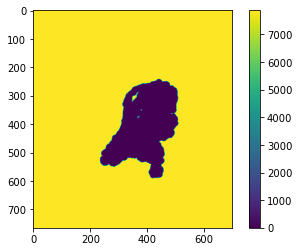

In [128]:
plt.imshow(f)
plt.colorbar()
plt.show()

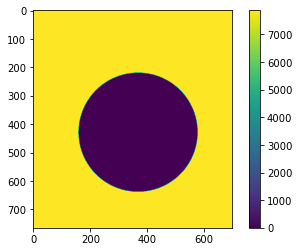

In [129]:
plt.imshow(f1)
plt.colorbar()
plt.show()

[2013, 10, 21]
[2013, 10, 23]
E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310210000_NL.h5


C:\Users\zywang\AppData\Local\Temp/ipykernel_36440/1552642485.py:127: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filename_MFBS)['image1']['image_data']


F://2013/10/RAD_NL25_RAP_5min_201310210000.h5


C:\Users\zywang\AppData\Local\Temp/ipykernel_36440/1552642485.py:134: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f1 = h5py.File(filename_RT)['image1']['image_data']


E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310210005_NL.h5
F://2013/10/RAD_NL25_RAP_5min_201310210005.h5
E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310210010_NL.h5
F://2013/10/RAD_NL25_RAP_5min_201310210010.h5
E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310210015_NL.h5
F://2013/10/RAD_NL25_RAP_5min_201310210015.h5
E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310210020_NL.h5
F://2013/10/RAD_NL25_RAP_5min_201310210020.h5
E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310210025_NL.h5
F

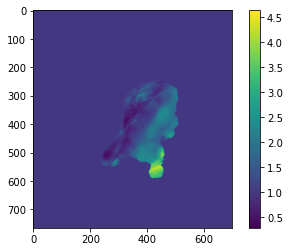

In [139]:
output_image = average_31_days_MFBS(2013, 10, 22)
plt.imshow(output_image)
plt.colorbar()
plt.show()

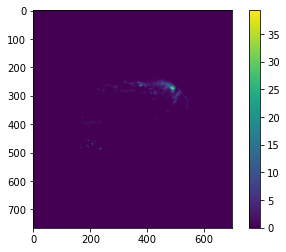

In [189]:
# get the processed image
processed_image = np.zeros((765, 700))
for x in range(0, 765):
    for y in range(0, 700):
        if(f1[x][y] < 5000):
            processed_image[x][y] = f1[x][y] * output_image[x][y]
plt.imshow(processed_image)
plt.colorbar()
plt.show()

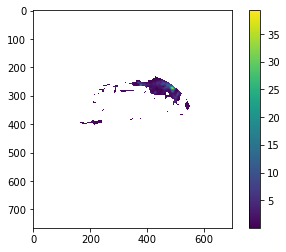

In [190]:
show_image = np.ma.masked_where(processed_image <= 0, processed_image)
plt.imshow(show_image)
plt.colorbar()
plt.show()

In [192]:
# calculate mse and mae
i = 0
for x in range(0, 765):
    for y in range(0, 700):
        if (f[x][y] < 5000) and (processed_image[x][y] < 5000):
            MSE1 = MSE1 + (f[x][y] - processed_image[x][y])*(f[x][y] - processed_image[x][y])
            MAE1 = MAE1 + abs(f[x][y] - processed_image[x][y])
            i = i + 1
MSE1 = MSE1 / i
MAE1 = MAE1 / i
print("After CARROTS, the MSE is:" + str(MSE1))
print("After CARROTS, the MAE is:" + str(MAE1))

After CARROTS, the MSE is:1.428289713701272
After CARROTS, the MAE is:0.20014452524844156
